In [1]:
# Import all the libraries that we will be using

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import math

import scipy.stats as sp

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [2]:
# Import our data into a dataframe and view it

file = "caffeine.csv"
df=pd.read_csv(file)
df

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water
608,Tonic Water,295.735000,110,0,Water


In [3]:
# Copy DataFrame so that we do not overwrite the original

df2=df.copy()

In [4]:
# Some feature engineering to create density of caffeine and density of calories
df2['caffeine_per_100ml']= df2["Caffeine (mg)"]/df2["Volume (ml)"]*100
df2['calories_per_100ml']= df2["Calories"]/df2["Volume (ml)"]*100
df2.head()

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml
0,Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,57.955534,0.000000
2,Hell Energy Coffee,250.191810,150,100,Coffee,39.969334,59.954001
3,Killer Coffee (AU),250.191810,0,430,Coffee,171.868136,0.000000
4,Nescafe Gold,250.191810,0,66,Coffee,26.379760,0.000000


In [5]:
# Rename columns and create a nice presentation of the dataframe

df3 = df2.rename(columns = {"drink": "Drink Name", "type": "Type", "caffeine_per_100ml": "Caffeine per 100 ml",
                            "calories_per_100ml": "Calories per 100 ml", "Volume (ml)": "Volume (ml)  ",
                            "Calories": "Calories"})
#df3.style.set_properties(**{'text-align': 'center'})
#df3.groupby("Type").head(1).set_index("Drink Name")

df3 = df3.groupby("Type").head(1).style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
df3.set_properties(**{'text-align': 'left'}).hide_index()

C:\Users\sajid\AppData\Local\Temp\ipykernel_6964\3492005763.py:10: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df3.set_properties(**{'text-align': 'left'}).hide_index()


Drink Name,Volume (ml),Calories,Caffeine (mg),Type,Caffeine per 100 ml,Calories per 100 ml
Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000
28 Black Energy Drink,250.191810,125,80,Energy Drinks,31.975467,49.961667
Spike Energy Double Shot,125.983110,0,350,Energy Shots,277.815018,0.000000
Red Bull Simply Cola,250.191810,0,32,Soft Drinks,12.790187,0.000000
PG Tips Black Tea,200.508330,0,50,Tea,24.936620,0.000000
Perrier Energize,250.191810,35,99,Water,39.569641,13.989267


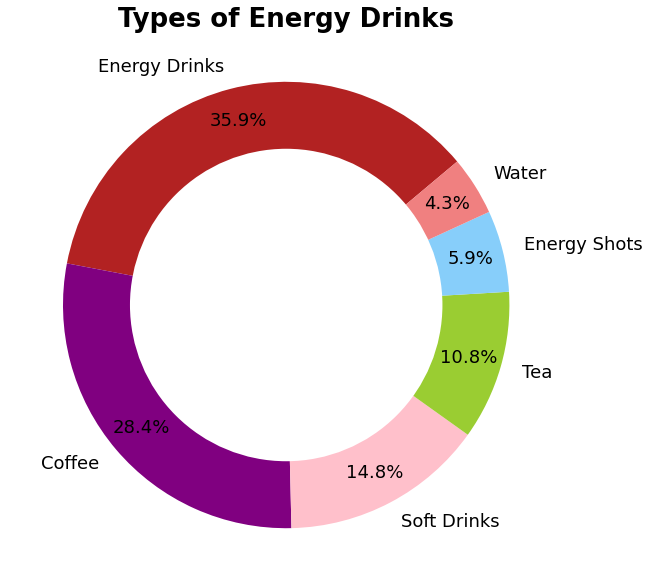

In [6]:
# Pie Chart of different types of energy drinks

drink_types = df2.type.value_counts().index.tolist()
drink_type_counts = df2.type.value_counts().values.tolist()
colors = ["firebrick", "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
explode = (0, 0, 0, 0, 0, 0)

fig = plt.figure(figsize=(10,10))

plt.title("Types of Energy Drinks", fontsize = 26, fontweight = "bold", font = "DejaVu Sans")
plt.axis("equal")

centre_circle = plt.Circle((0,0), 0.70, fc='white')



plt.pie(drink_type_counts, explode=explode, labels=drink_types, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=40, textprops={'fontsize': 18}, pctdistance=0.85)

fig.gca().add_artist(centre_circle)
plt.show()

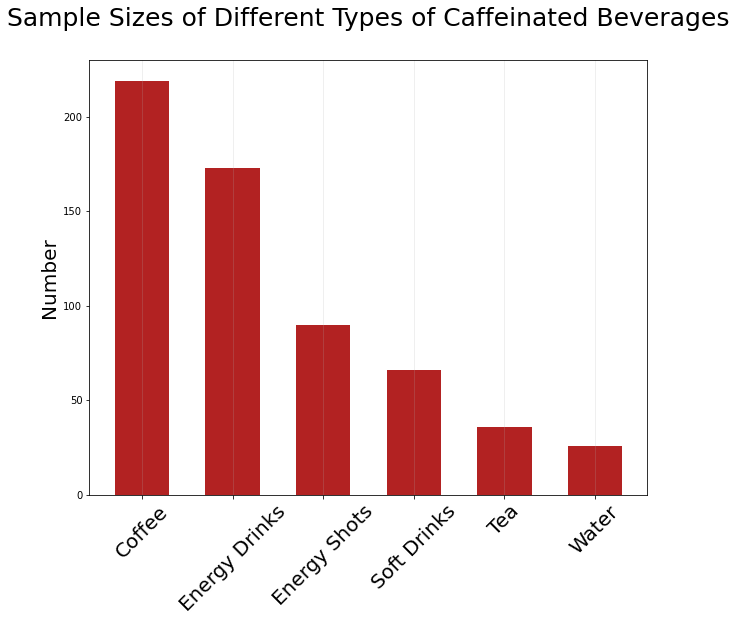

In [7]:
# Bar Graph of different types of energy drinks

# step 1, get the data

x = df2.type.sort_values().unique()
y = df2.type.sort_values().value_counts()

# step 2, init the plot

fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="firebrick", width=0.6)

# step 3, customization

plt.title("Sample Sizes of Different Types of Caffeinated Beverages\n", fontsize = 25)

plt.ylabel("Number", fontsize = 20)
plt.grid(axis="x", alpha=0.25)
# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)
# Sets the y limits of the current chart
#plt.ylim(0, max(y)+20)
plt.xticks(rotation=45, fontsize = 20)
# step 4, saving/showing
plt.show()

This section is about analysis for caffeine

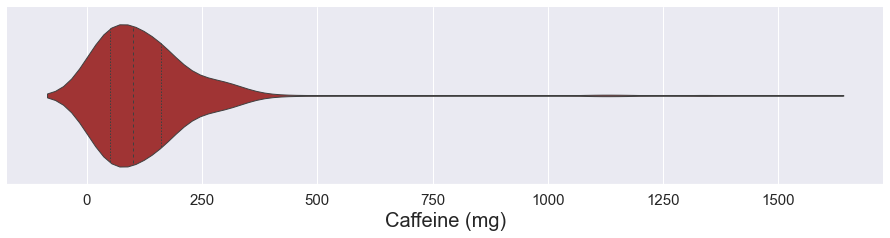

In [8]:
# Violin Plot of Caffeine distribution

sns.set(rc={'figure.figsize':(15.7,3.27)})
sns.violinplot(data=df2, x="Caffeine (mg)", split=True, inner="quart", linewidth=1, palette = {"firebrick"})
sns.despine(left=True)
plt.xlabel("Caffeine (mg)", fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

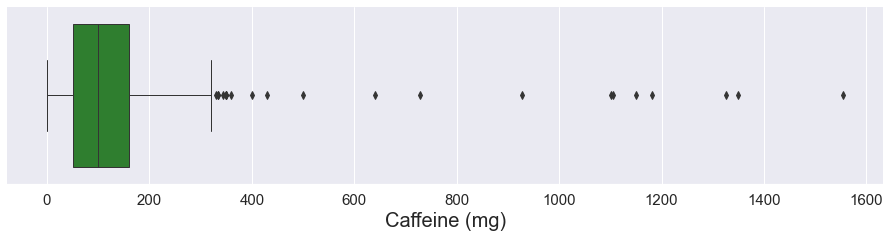

In [9]:
# Box Plot of Caffeine distribution to see outliers

sns.set(rc={'figure.figsize':(15.7,3.27)})
sns.boxplot(data=df2, x="Caffeine (mg)", linewidth=1, palette = {"forestgreen"})
sns.despine(left=True)
plt.xlabel("Caffeine (mg)", fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

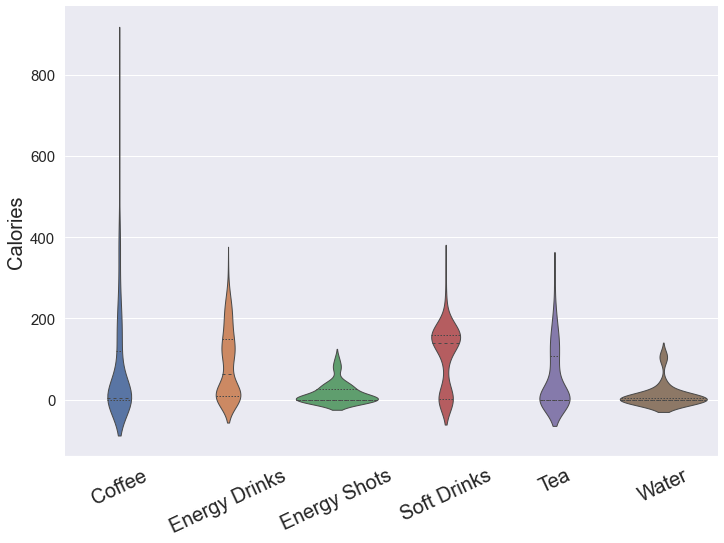

In [10]:
# Caffeine by drink type

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=df2, x="type", y="Calories", split=True, inner="quart", linewidth=1)
sns.despine(left=True)
plt.ylabel("Calories", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xlabel("")
plt.xticks(fontsize = 20, rotation = 25)
plt.show()

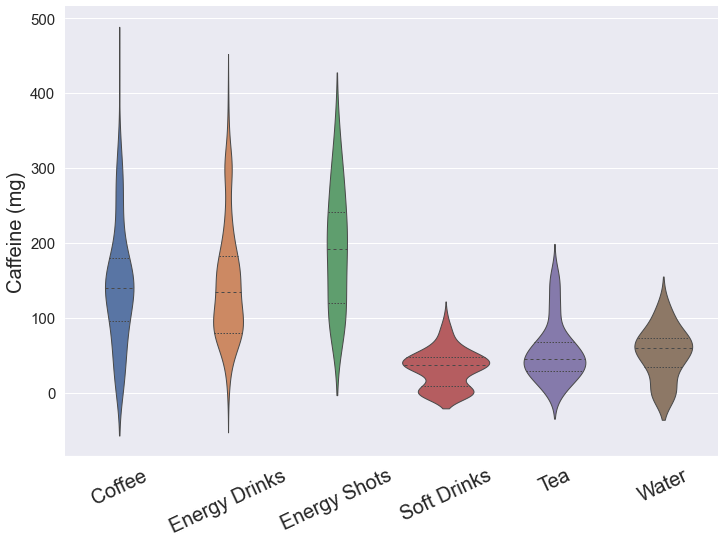

In [54]:
# filtering out the outliers in the coffee category

df2caf_filter = df2.loc[df2["Caffeine (mg)"] < 500].set_index('drink')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=df2caf_filter, x="type", y="Caffeine (mg)", split=True, inner="quart", linewidth=1)
sns.despine(left=True)
plt.ylabel("Caffeine (mg)", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xlabel("")
plt.xticks(fontsize = 20, rotation = 25)
plt.show()

This section is about analysis for Calories

In [12]:
# feature engineering. Create a column for diet versus regular. All drinks below 10 calories are diet 
# except for Tea, Water, and Energy shots which are never diet.

df2["diet"] = True
for k in range(len(df2)):
    if df2.Calories.values.tolist()[k] < 10:
        df2.loc[k, "diet"] = "Diet"
    else:
        df2.loc[k, "diet"] = "Regular"
    if (df2.loc[k, "type"] == "Water") | (df2.loc[k, "type"] == "Tea") | (df2.loc[k, "type"] == "Energy Shots"):
        df2.loc[k, "diet"] = "Regular"
df2.head(3)

,drink,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet
0,Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000,Diet
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,57.955534,0.000000,Diet
2,Hell Energy Coffee,250.191810,150,100,Coffee,39.969334,59.954001,Regular


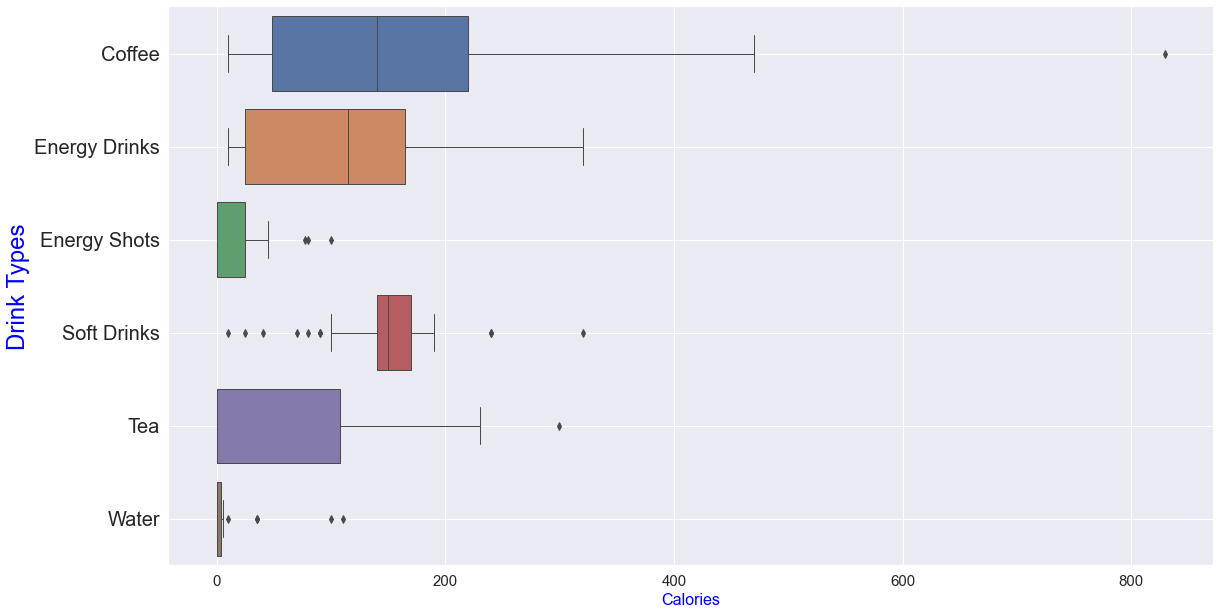

In [13]:
#boxplots of Calories in different types of energy drinks to find outliers

sns.set(rc={'figure.figsize':(18.7,10.27)})
ax = sns.boxplot(data=df2.loc[df2.diet == "Regular"], y="type", x="Calories", linewidth=1)
sns.despine(left=True)
plt.xlabel("Calories", fontsize = 16, color = "blue")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Drink Types", fontsize = 24, color = "blue")
ax.grid(True, which = 'both')
plt.show()

In [93]:
# filter for outliers from the boxplot above.

mask1 = (df2["type"] == "Coffee") & (df2["Calories"] < 500)
mask2 = (df2["type"] == "Water") & (df2["Calories"] < 5)
mask3 = (df2["type"] == "Energy Shots") & (df2["Calories"] < 75)
mask4 = (df2["type"] == "Tea") & (df2["Calories"] < 270)
mask5 = (df2["type"] == "Energy Drinks")
mask6 = (df2["type"] == "Soft Drinks") & (df2["Calories"] < 200) & (df2["Calories"] > 95)
df2cal_filter = df2.loc[df2.diet == "Regular"]
df2cal_filter = df2.loc[mask1 | mask2 | mask3 | mask4 | mask5 | mask6].set_index('drink')
#df2cal_filter.head()

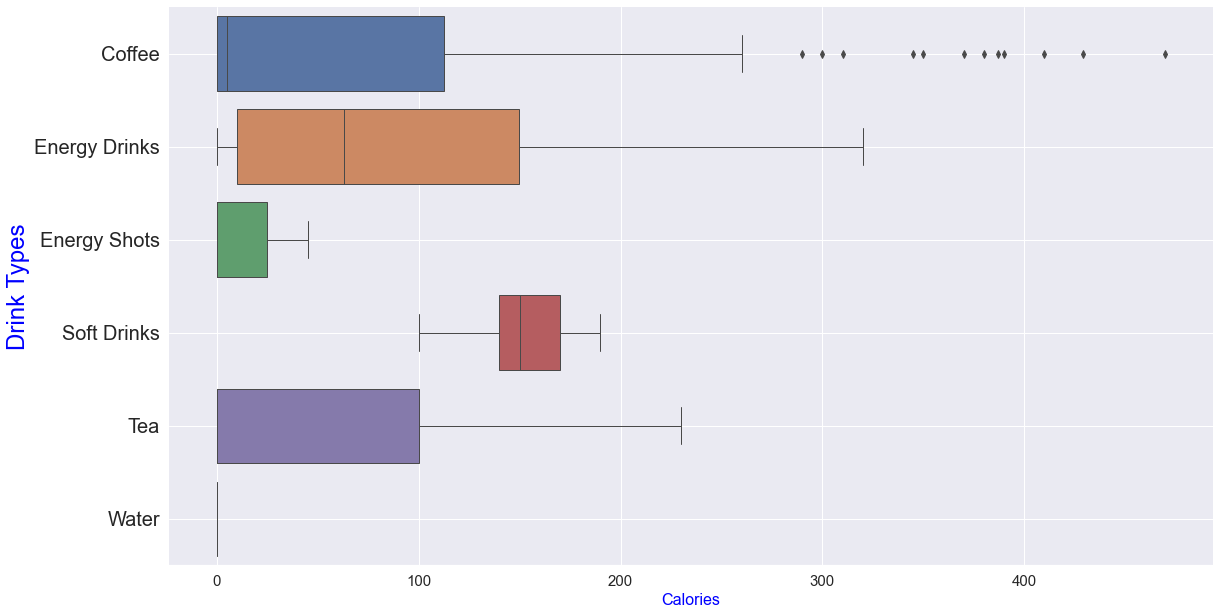

In [94]:
# Create a new boxplot after filtering out the outliers. 

sns.set(rc={'figure.figsize':(18.7,10.27)})
ax = sns.boxplot(data=df2cal_filter, y="type", x="Calories", linewidth=1)
sns.despine(left=True)
plt.xlabel("Calories", fontsize = 16, color = "blue")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Drink Types", fontsize = 24, color = "blue")
ax.grid(True, which = 'both')
plt.show()

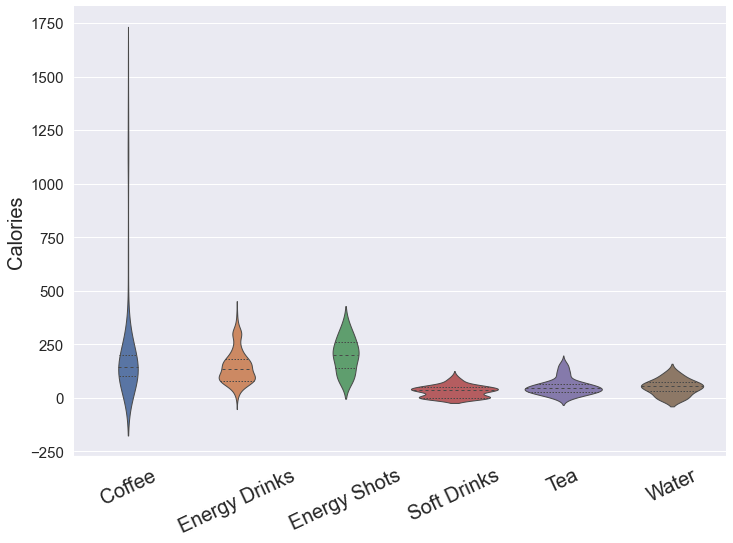

In [95]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=df2cal_filter, x="type", y="Caffeine (mg)", split=True, inner="quart", linewidth=1)
sns.despine(left=True)
plt.ylabel("Calories", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xlabel("")
plt.xticks(fontsize = 20, rotation = 25)
plt.show()

In [138]:
df2cal_filter.groupby("type").mean()

,Volume (ml),Calories,Caffeine (mg),caffeine_per_100ml,calories_per_100ml
type,,,,,
Coffee,335.072569,69.098837,201.686047,67.192820,18.573091
Energy Drinks,388.971198,86.671233,147.867580,38.395152,23.188496
Energy Shots,58.331488,10.212121,200.393939,401.443612,28.014768
Soft Drinks,353.574540,154.298246,31.982456,8.978729,43.642177
Tea,358.740204,48.969231,54.400000,17.030276,11.456475
Water,392.160175,0.000000,50.894737,13.523075,0.000000


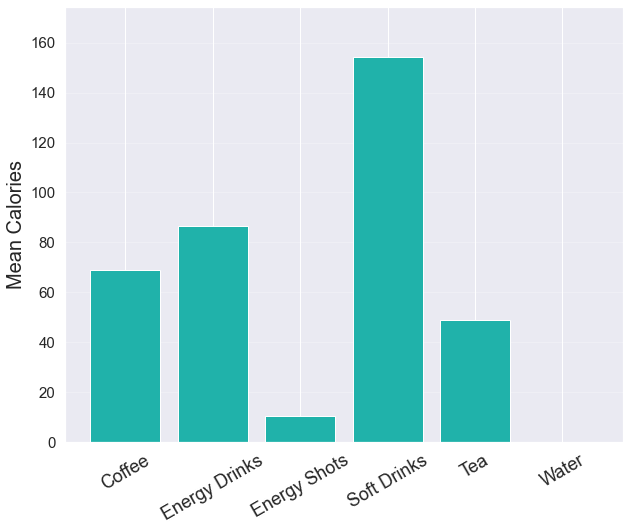

In [141]:
#BAR GRAPH OF MEAN CALORIES BY DRINK TYPE AFTER DATA HAS BEEN FILTERED FOR OUTLIERS AND DIET BEVERAGES

# step 1, get the data
x = df2cal_filter.groupby("type").mean().index.values
y= df2cal_filter.groupby("type").mean().Calories.values


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightseagreen")

# step 3, customization
#plt.title("Calories by drink type")
plt.ylabel("Mean Calories", fontsize = 20)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=30, fontsize = 18)
plt.yticks(fontsize = 15)

# step 4, saving/showing
plt.show()

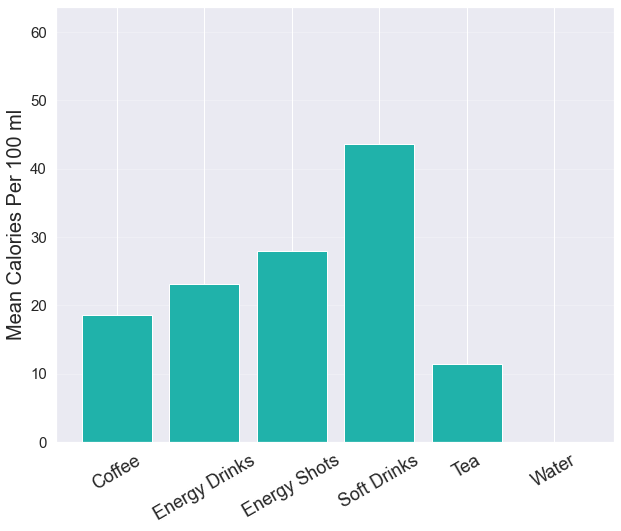

In [140]:
#BAR GRAPH OF MEAN CALORIC DENSITY (PER 100 ML) BY DRINK TYPE AFTER DATA HAS BEEN FILTERED FOR OUTLIERS AND DIET BEVERAGES

# step 1, get the data
x = df2cal_filter.groupby("type").mean().index.values
y= df2cal_filter.groupby("type").mean().calories_per_100ml.values


# step 2, init the plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y,color="lightseagreen")

# step 3, customization
#plt.title("Calories by drink type")
plt.ylabel("Mean Calories Per 100 ml", fontsize = 20)
plt.grid(axis="y", alpha=0.25)

# Sets the x limits of the current chart
#plt.xlim(-0.5, 4.5)

# Sets the y limits of the current chart
plt.ylim(0, max(y)+20)
plt.xticks(rotation=30, fontsize = 18)
plt.yticks(fontsize = 15)

# step 4, saving/showing
plt.show()

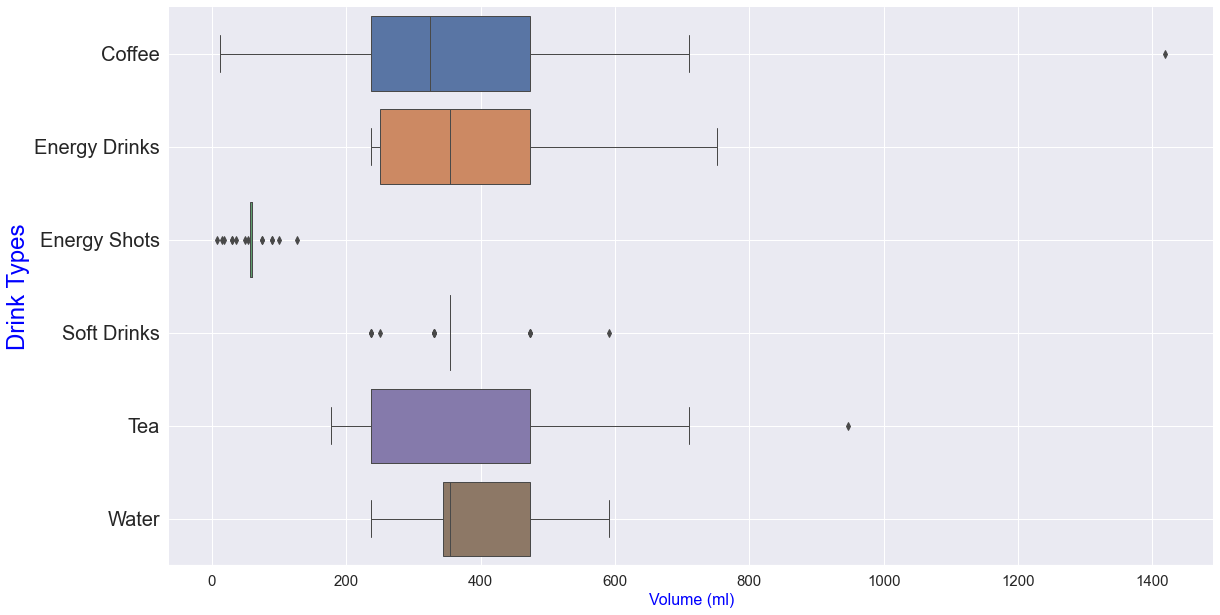

In [96]:
# This section is for an analysis on Volume

sns.set(rc={'figure.figsize':(18.7,10.27)})
ax = sns.boxplot(data=df2, y="type", x="Volume (ml)", linewidth=1)
sns.despine(left=True)
plt.xlabel("Volume (ml)", fontsize = 16, color = "blue")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Drink Types", fontsize = 24, color = "blue")
ax.grid(True, which = 'both')
plt.show()

In [97]:
# This section is to remove outliers in volume 

maskv1 = (df2["type"] == "Coffee") & (df2["Volume (ml)"] < 1400)
maskv2 = (df2["type"] == "Energy Shots") & (df2["Volume (ml)"] > 54) & (df2["Volume (ml)"] < 65)
maskv3 = (df2["type"] == "Tea") & (df2["Volume (ml)"] < 800)
maskv4 = (df2["type"] == "Soft Drinks") & (df2["Volume (ml)"] < 400) & (df2["Volume (ml)"] > 340)
maskv5 = (df2["type"] == "Water")
maskv6 = (df2["type"] == "Energy Drinks")
df2vol_filter = df2.loc[maskv1 | maskv2 | maskv3 | maskv4 | maskv5 | maskv6].set_index('drink')
#df2vol_filter.head()

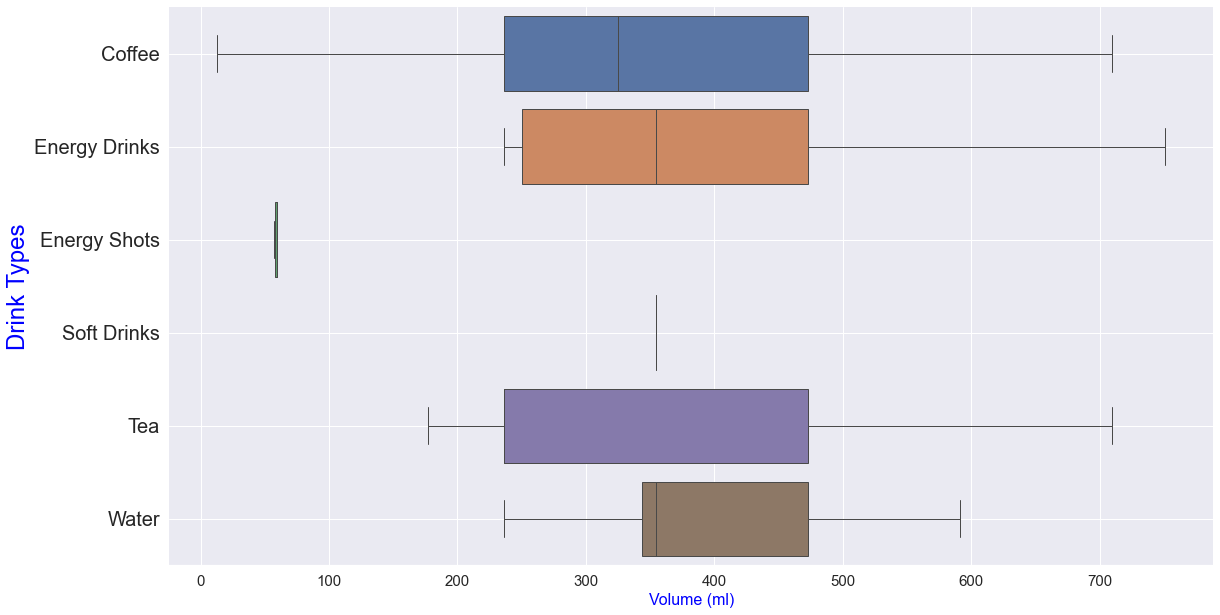

In [98]:
# After removing outliers

sns.set(rc={'figure.figsize':(18.7,10.27)})
ax = sns.boxplot(data=df2vol_filter, y="type", x="Volume (ml)", linewidth=1)
sns.despine(left=True)
plt.xlabel("Volume (ml)", fontsize = 16, color = "blue")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Drink Types", fontsize = 24, color = "blue")
ax.grid(True, which = 'both')
plt.show()

In [102]:
df2.columns

Index(['drink', 'Volume (ml)', 'Calories', 'Caffeine (mg)', 'type',
       'caffeine_per_100ml', 'calories_per_100ml', 'diet'],
      dtype='object')

In [107]:
# let us combine the filtered data sets of caffeine, calories, and volume by concatenating and dropping duplicates

df2full_filter1 = df2caf_filter.merge(df2cal_filter, on=['drink', 'Volume (ml)', 'Calories', 'Caffeine (mg)', 'type',
       'caffeine_per_100ml', 'calories_per_100ml', 'diet'], how='inner')
df2full_filter = df2full_filter1.merge(df2vol_filter, on=['drink', 'Volume (ml)', 'Calories', 'Caffeine (mg)', 'type',
       'caffeine_per_100ml', 'calories_per_100ml', 'diet'], how='inner')
df2full_filter.head()

,Volume (ml),Calories,Caffeine (mg),type,caffeine_per_100ml,calories_per_100ml,diet
drink,,,,,,,
Costa Coffee,256.993715,0,277,Coffee,107.784737,0.000000,Diet
Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,57.955534,0.000000,Diet
Hell Energy Coffee,250.191810,150,100,Coffee,39.969334,59.954001,Regular
Killer Coffee (AU),250.191810,0,430,Coffee,171.868136,0.000000,Diet
Nescafe Gold,250.191810,0,66,Coffee,26.379760,0.000000,Diet


In [111]:
# Let us do some regression analysis based on our cleaned data set. First I will rename columns and do some correlations
df2full_filter = df2full_filter.rename(columns = {"caffeine_per_100ml": "Caffeine Per 100 ml", "calories_per_100ml": "Calories Per 100 ml"})
df2full_filter.corr()

,Volume (ml),Calories,Caffeine (mg),Caffeine Per 100 ml,Calories Per 100 ml
Volume (ml),1.000000,0.344554,0.189190,-0.490511,0.103493
Calories,0.344554,1.000000,-0.107022,-0.232220,0.909358
Caffeine (mg),0.189190,-0.107022,1.000000,0.467557,-0.185042
Caffeine Per 100 ml,-0.490511,-0.232220,0.467557,1.000000,-0.157923
Calories Per 100 ml,0.103493,0.909358,-0.185042,-0.157923,1.000000


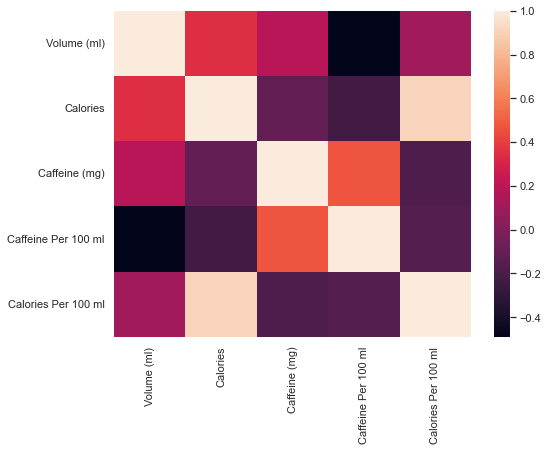

In [119]:
fig, ax = plt.subplots(figsize=(8, 6))
s1 = sns.heatmap(df2full_filter.corr())
plt.show()

In [121]:
df2full_filter.columns

Index(['Volume (ml)', 'Calories', 'Caffeine (mg)', 'type',
       'Caffeine Per 100 ml', 'Calories Per 100 ml', 'diet'],
      dtype='object')

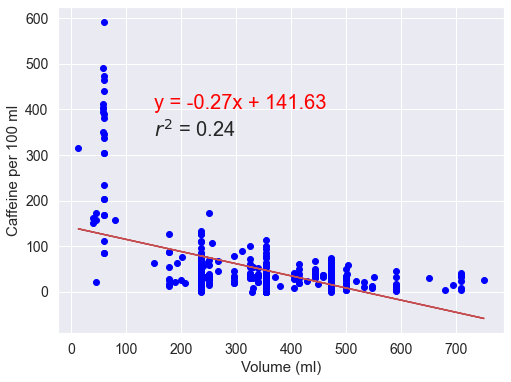

In [126]:
# Density of Caffeine per 100ml versus volume (ml). This is because a negative correlation shows up.

plt.figure(figsize=(8,6))
y=df2full_filter["Caffeine Per 100 ml"].values
x=df2full_filter["Volume (ml)"].values
plt.scatter(x,y, c='blue')
#plt.title(f'Caf Versus Caffeine for {cols[i].capitalize()}')
plt.xlabel("Volume (ml)", fontsize = 15)
plt.ylabel("Caffeine per 100 ml", fontsize = 15)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_points = x * slope + intercept
plt.plot(x,regress_points,"r-")
regress_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(regress_equation, [150,400], color = 'red', fontsize = 20)
plt.annotate(f'$r^2$ = {round(rvalue**2,2)}', [150,340], fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

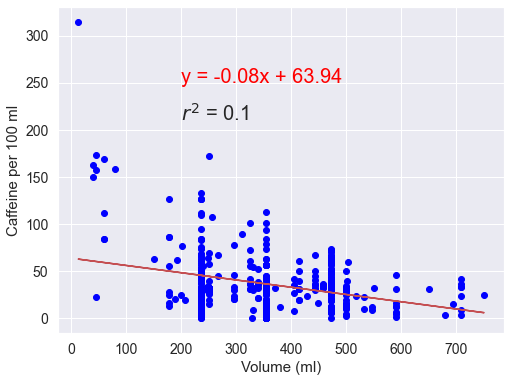

In [128]:
# Density of Caffeine per 100ml versus volume (ml). This is because a negative correlation shows up.
# We will filter out the vertical blue dots at 57 ml because those are all energy shots

mask = (df2full_filter["type"] != "Energy Shots")

plt.figure(figsize=(8,6))
y=df2full_filter.loc[mask]["Caffeine Per 100 ml"].values
x=df2full_filter.loc[mask]["Volume (ml)"].values
plt.scatter(x,y, c='blue')
#plt.title(f'Caf Versus Caffeine for {cols[i].capitalize()}')
plt.xlabel("Volume (ml)", fontsize = 15)
plt.ylabel("Caffeine per 100 ml", fontsize = 15)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_points = x * slope + intercept
plt.plot(x,regress_points,"r-")
regress_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(regress_equation, [200,250], color = 'red', fontsize = 20)
plt.annotate(f'$r^2$ = {round(rvalue**2,2)}', [200,210], fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

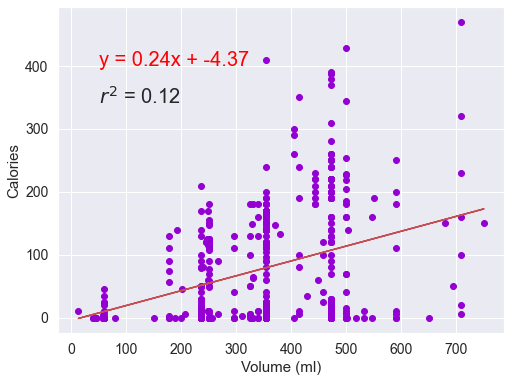

In [129]:
# We will do calories versus volume (ml) because the correlation is decent

#mask = (df2full_filter["type"] == "Energy Drinks") | (df2full_filter["type"] == "Coffee")
#mask = (df2full_filter["type"] != "Energy Shots")
plt.figure(figsize=(8,6))
y=df2full_filter["Calories"].values
x=df2full_filter["Volume (ml)"].values
plt.scatter(x,y, c='darkviolet')
#plt.title(f'Caf Versus Caffeine for {cols[i].capitalize()}')
plt.xlabel("Volume (ml)", fontsize = 15)
plt.ylabel("Calories", fontsize = 15)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_points = x * slope + intercept
plt.plot(x,regress_points,"r-")
regress_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(regress_equation, [50,400], color = 'red', fontsize = 20)
plt.annotate(f'$r^2$ = {round(rvalue**2,2)}', [50,340], fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

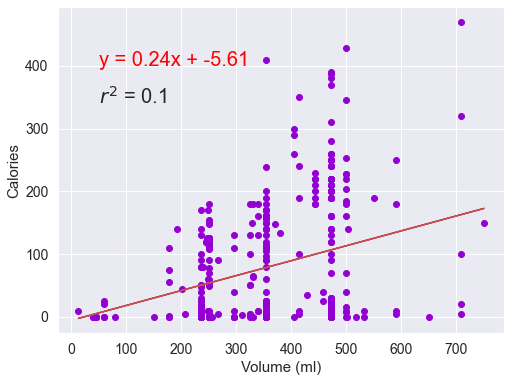

In [130]:
# We will filter the above graph for energy drinks and coffee because they are a little more interesting

mask = (df2full_filter["type"] == "Energy Drinks") | (df2full_filter["type"] == "Coffee")

plt.figure(figsize=(8,6))
y=df2full_filter.loc[mask]["Calories"].values
x=df2full_filter.loc[mask]["Volume (ml)"].values
plt.scatter(x,y, c='darkviolet')
#plt.title(f'Caf Versus Caffeine for {cols[i].capitalize()}')
plt.xlabel("Volume (ml)", fontsize = 15)
plt.ylabel("Calories", fontsize = 15)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_points = x * slope + intercept
plt.plot(x,regress_points,"r-")
regress_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(regress_equation, [50,400], color = 'red', fontsize = 20)
plt.annotate(f'$r^2$ = {round(rvalue**2,2)}', [50,340], fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

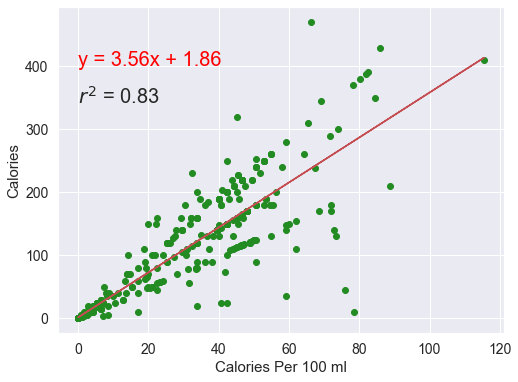

In [131]:
# Lastly, we will do a regression between Calories per 100 ml and Calories

plt.figure(figsize=(8,6))
y=df2full_filter["Calories"].values
x=df2full_filter["Calories Per 100 ml"].values
plt.scatter(x,y, c='forestgreen')
#plt.title(f'Caf Versus Caffeine for {cols[i].capitalize()}')
plt.xlabel("Calories Per 100 ml", fontsize = 15)
plt.ylabel("Calories", fontsize = 15)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_points = x * slope + intercept
plt.plot(x,regress_points,"r-")
regress_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(regress_equation, [0,400], color = 'red', fontsize = 20)
plt.annotate(f'$r^2$ = {round(rvalue**2,2)}', [0,340], fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [157]:
mask28 = (df2caf_filter["type"] == "Coffee") | (df2caf_filter["type"] == "Energy Drinks") | (df2caf_filter["type"] == "Soft Drinks")
df2500seaborn = df2caf_filter.loc[mask28]
df2500seaborn = df2500seaborn.rename(columns = {"type": "Types of Caffeinated Beverages", "diet": "Calorie Type"})

In [158]:
df2500seaborn["Types of Caffeinated Beverages"].value_counts()

Energy Drinks    219
Coffee           162
Soft Drinks       90
Name: Types of Caffeinated Beverages, dtype: int64

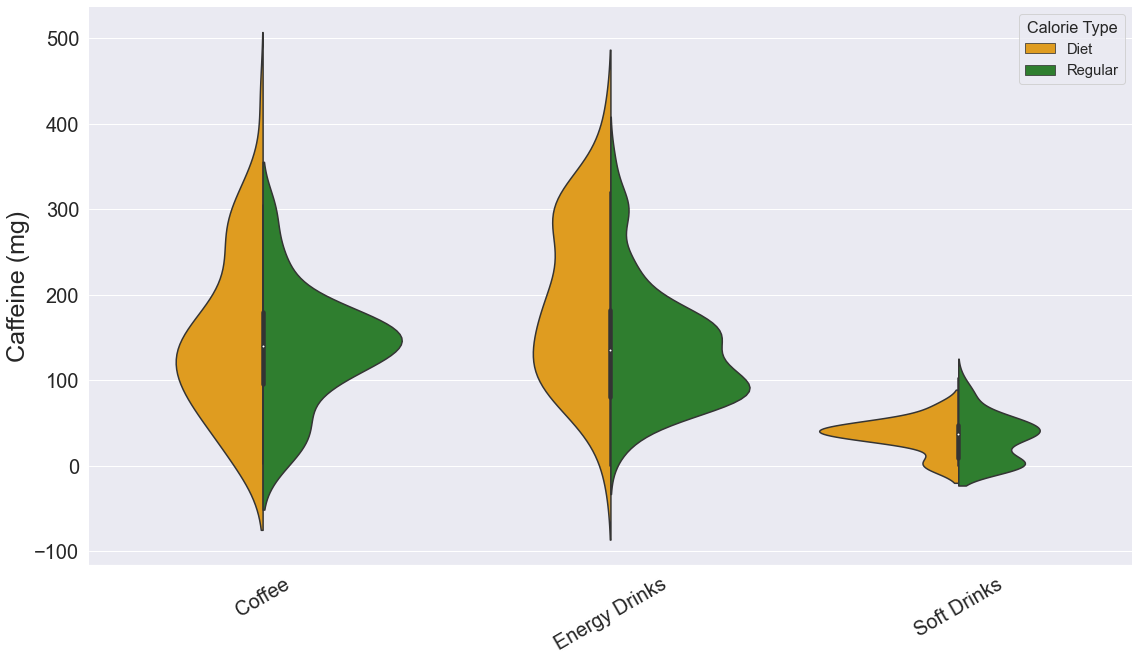

In [159]:
# Let us compare the distributions of caffeine in diet drinks versus regular drinks after filtering for caffeine outliers
# The only distributions that will show up our Coffee, Energy Drinks, and Soft Drinks, because the rest of the types
# have too many low calorie options

sns.set_theme(style='white')

sns.set(font_scale = 1.35)
#sns.set(x_label = "Types of Caffeinated Beverages")

sns.violinplot(data=df2500seaborn, x="Types of Caffeinated Beverages", y="Caffeine (mg)", 
                     hue="Calorie Type", split = True,
                     palette={"Regular": "forestgreen", "Diet": "orange"})
               #split=True, inner="quart", linewidth=1,
plt.ylabel("Caffeine (mg)", fontsize = 25)
plt.yticks(fontsize = 20)
plt.xlabel("")
plt.xticks(fontsize = 20, rotation = 30)

#plt.suptitle('Distribution of Caffeine in Different Types of Caffeinated Beverages')
#plt.title('Data filtered to remove caffeine content greater than 500 mg')
sns.despine(left=True)

In this section, we will do a TTest to compare whether the distributions of Caffeine in Regular and Diet Drinks are 
the same. However, we will only do it for the above three types of drinks.

In [161]:
df2500seaborn.groupby("Calorie Type").mean()

,Volume (ml),Calories,Caffeine (mg),caffeine_per_100ml,calories_per_100ml
Calorie Type,,,,,
Diet,332.343491,1.078947,145.276316,49.192673,0.314984
Regular,375.478691,129.432602,114.326019,32.047839,35.080330


In [162]:
df2500seaborn.groupby("Calorie Type").var()

,Volume (ml),Calories,Caffeine (mg),caffeine_per_100ml,calories_per_100ml
Calorie Type,,,,,
Diet,15904.960901,4.377832,9784.572151,1434.458956,0.421334
Regular,11253.960635,9261.686481,5450.188975,656.671439,495.693348


In [164]:
# The variances are not the same.

dietdrinks = df2500.loc[df2.diet == "Diet", "Caffeine (mg)"].tolist()
regulardrinks = df2500.loc[df2.diet == "Regular", "Caffeine (mg)"].tolist()

sp.ttest_ind(dietdrinks,regulardrinks,equal_var=False)

Ttest_indResult(statistic=4.173302615588638, pvalue=4.353368642755875e-05)

In this section we will do brand analysis. First we will create a new feature called brand and assign it to 
five major brands.

In [178]:
df2["brand"] = "Other"

for i in range(len(df2)):
    if df2.loc[i, 'drink'].find("Coca") != -1:
        df2.loc[i, 'brand'] = "Coca-Cola"
    elif df2.loc[i, 'drink'].find("Starb") != -1:
        df2.loc[i, 'brand'] = "Starbucks"
    elif df2.loc[i, 'drink'].find("Dunk") != -1:
        df2.loc[i, 'brand'] = "Dunkin"
    elif df2.loc[i, 'drink'].find("Peet") != -1:
        df2.loc[i, 'brand'] = "Peet's"
    elif df2.loc[i, 'drink'].find("Monst") != -1:
        df2.loc[i, 'brand'] = "Monster"

In [183]:
df2.brand.value_counts().index.tolist()

['Other', 'Starbucks', 'Monster', 'Coca-Cola', 'Dunkin', "Peet's"]

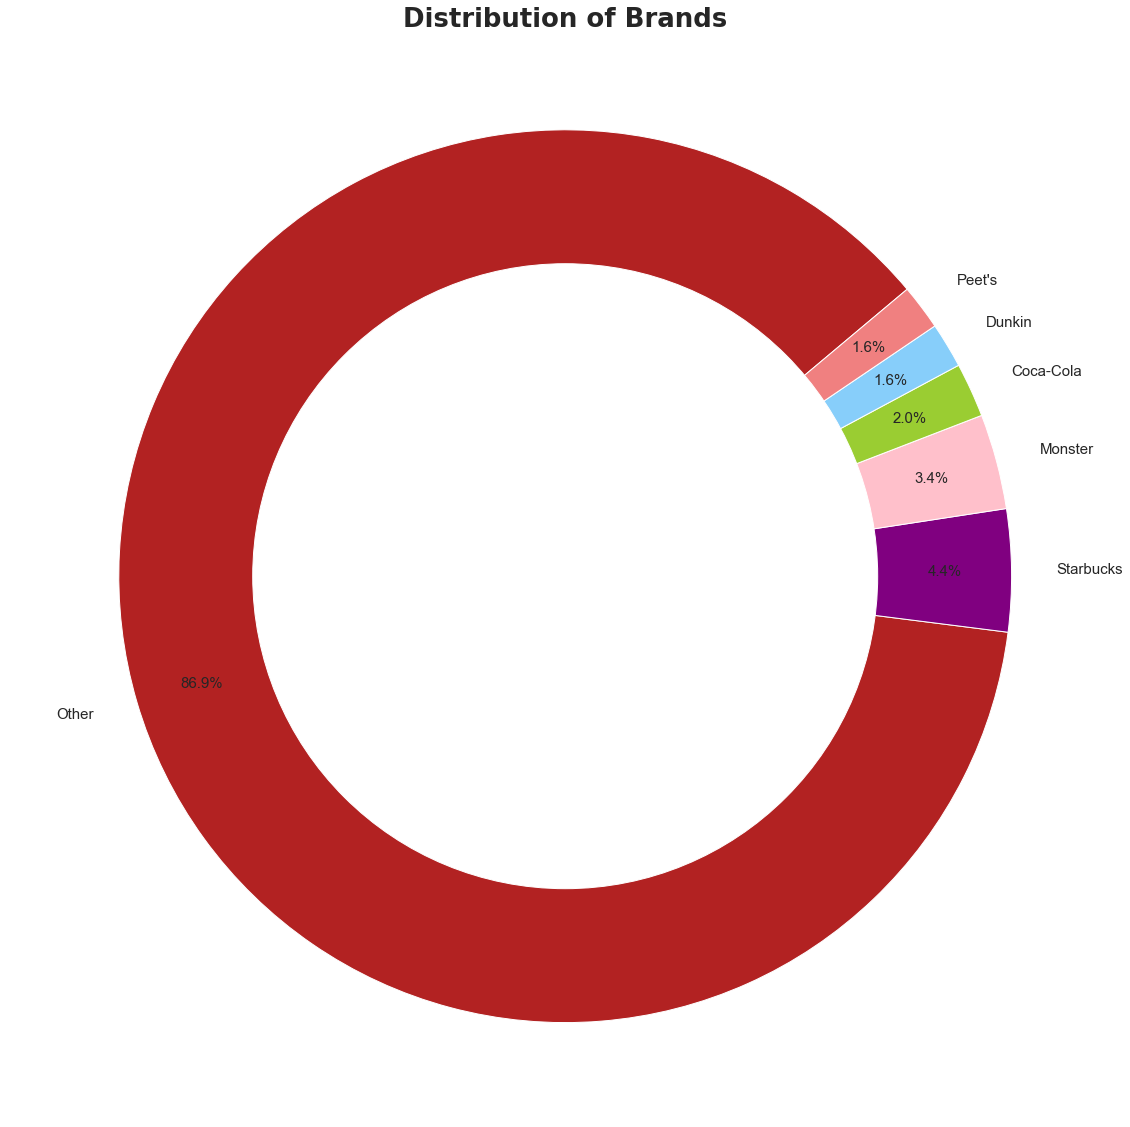

In [184]:
# Make a pie chart of the distribution of brands

drink_brands = df2.brand.value_counts().index.tolist()
drink_brand_counts = df2.brand.value_counts().tolist()
colors = ["firebrick", "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
explode = (0, 0, 0, 0, 0, 0)

fig = plt.figure(figsize=(20,20))

plt.title("Distribution of Brands", fontsize = 26, fontweight = "bold", font = "DejaVu Sans")
plt.axis("equal")

centre_circle = plt.Circle((0,0), 0.70, fc='white')



plt.pie(drink_brand_counts, explode=explode, labels=drink_brands, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=40, textprops={'fontsize': 15}, pctdistance=0.85)

fig.gca().add_artist(centre_circle)
plt.show()

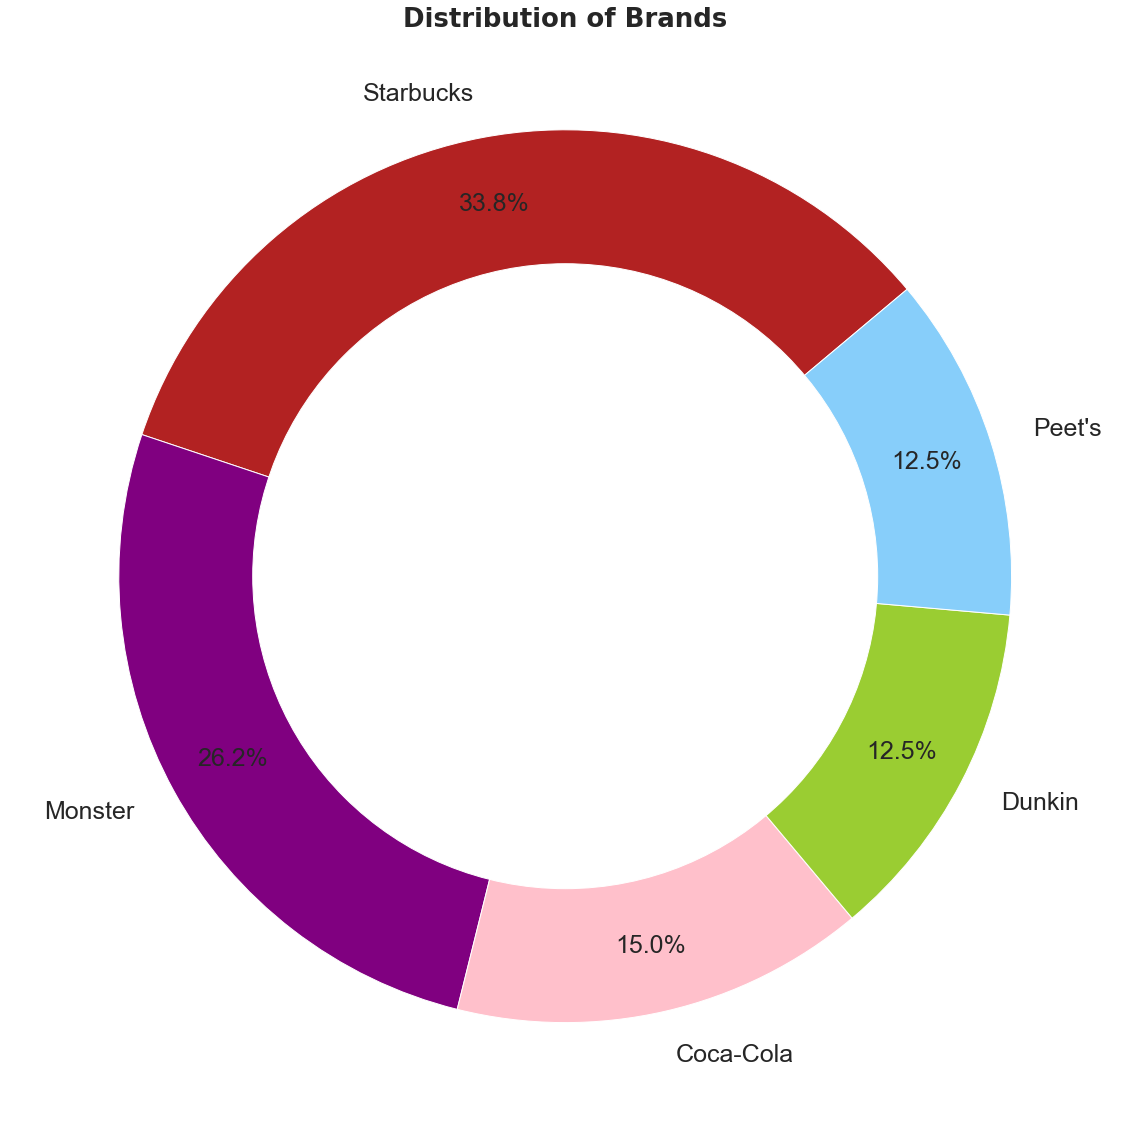

In [187]:
# Since other makes up 87% of all brands, let us exclude it.

mask43 = df2.brand != "Other"

drink_brands = df2.loc[mask43].brand.value_counts().index.tolist()
drink_brand_counts = df2.loc[mask43].brand.value_counts().tolist()
colors = ["firebrick", "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
explode = (0, 0, 0, 0, 0)

fig = plt.figure(figsize=(20,20))

plt.title("Distribution of Brands", fontsize = 26, fontweight = "bold", font = "DejaVu Sans")
plt.axis("equal")

centre_circle = plt.Circle((0,0), 0.70, fc='white')



plt.pie(drink_brand_counts, explode=explode, labels=drink_brands, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=40, textprops={'fontsize': 25}, pctdistance=0.85)

fig.gca().add_artist(centre_circle)
plt.show()

Let us do a TTest to see if there is a difference in caffeine between some brands. However, the sample size is small, and one outlier would destroy everything. We already know Starbucks has some massive outliers.

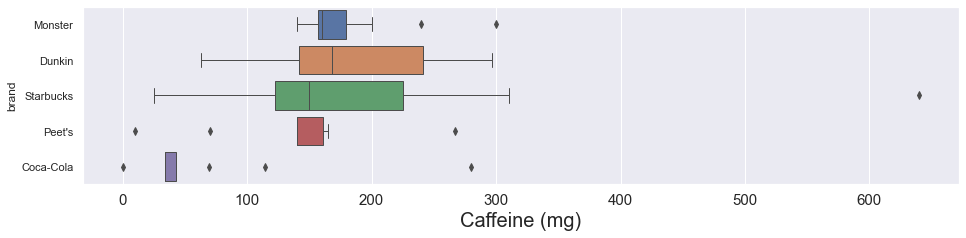

In [191]:
# Box Plot of Caffeine distribution to see outliers

mask43 = df2.brand != "Other"

sns.set(rc={'figure.figsize':(15.7,3.27)})
sns.boxplot(data=df2.loc[mask43], x="Caffeine (mg)", y="brand", linewidth=1)#, palette = {"forestgreen"})
#sns.despine(left=True)
plt.xlabel("Caffeine (mg)", fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

In [193]:
# We will focus on Monster, Dunkin and Starbucks. There are three outliers. Let us get rid of them.

maskb1 = (df2.brand == "Monster") & (df2["Caffeine (mg)"] < 220)
maskb2 = (df2.brand == "Starbucks") & (df2["Caffeine (mg)"] < 500)
maskb3 = (df2.brand == "Dunkin")
df2brandsTTest = df2.loc[maskb1 | maskb2 | maskb3]

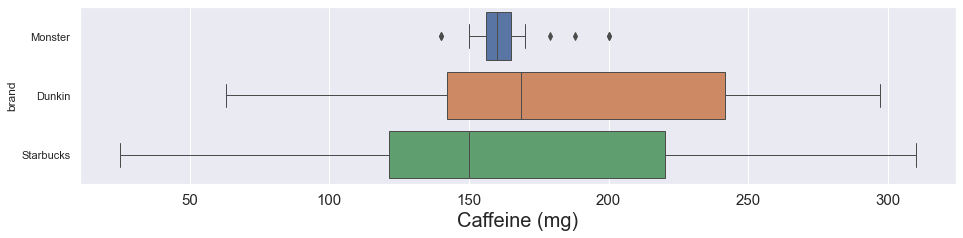

In [194]:
# Box Plot of Caffeine distribution to see if outliers have been removed

sns.set(rc={'figure.figsize':(15.7,3.27)})
sns.boxplot(data=df2brandsTTest, x="Caffeine (mg)", y="brand", linewidth=1)#, palette = {"forestgreen"})
#sns.despine(left=True)
plt.xlabel("Caffeine (mg)", fontsize = 20)
plt.xticks(fontsize = 15)
plt.show()

In [195]:
df2brandsTTest.groupby("brand").mean()["Caffeine (mg)"]

brand
Dunkin       180.200000
Monster      163.736842
Starbucks    157.500000
Name: Caffeine (mg), dtype: float64

In [196]:
df2brandsTTest.groupby("brand").var()["Caffeine (mg)"]

brand
Dunkin       5762.177778
Monster       287.649123
Starbucks    5704.500000
Name: Caffeine (mg), dtype: float64

We see that the variances of Dunkin an dStarbucks are very similar even though the means of Monster and Starbucks are very similar. We will do TTests to compare both.

In [197]:
sdc = df2brandsTTest.loc[df2brandsTTest.brand == "Starbucks"]["Caffeine (mg)"].tolist()
mdc = df2brandsTTest.loc[df2brandsTTest.brand == "Monster"]["Caffeine (mg)"].tolist()
ddc = df2brandsTTest.loc[df2brandsTTest.brand == "Dunkin"]["Caffeine (mg)"].tolist()

In [202]:
# Ttest between Starbucks and Monster for Caffeine content

sp.ttest_ind(sdc, mdc, equal_var=False)

Ttest_indResult(statistic=-0.40724265308274, pvalue=0.6868850926198921)

In [203]:
# Ttest between Starbucks and Dunkin for Caffeine content

sp.ttest_ind(sdc, ddc, equal_var=False)

Ttest_indResult(statistic=-0.8047714631978465, pvalue=0.43252874773924166)

In [204]:
# Ttest between Monster and Dunkin for Caffeine content

sp.ttest_ind(mdc, ddc, equal_var=False)

Ttest_indResult(statistic=-0.6769992647930914, pvalue=0.5145925759179389)

In [205]:
#Anova for Starbucks, Monster, and Dunkin

sp.f_oneway(sdc, mdc, ddc)

F_onewayResult(statistic=0.4846563605448738, pvalue=0.6186630052752647)